In [4]:
import pandas as pd
df = pd.read_csv('UNSW_NB15.csv')

In [5]:
df

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,175337,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,13,24,0,0,0,24,24,0,Generic,1
175337,175338,0.505762,tcp,-,FIN,10,8,620,354,33.612649,...,1,2,0,0,0,1,1,0,Shellcode,1
175338,175339,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,3,13,0,0,0,3,12,0,Generic,1
175339,175340,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,14,30,0,0,0,30,30,0,Generic,1


In [6]:
df['attack_cat'].value_counts()

attack_cat
Normal            56000
Generic           40000
Exploits          33393
Fuzzers           18184
DoS               12264
Reconnaissance    10491
Analysis           2000
Backdoor           1746
Shellcode          1133
Worms               130
Name: count, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Normal'),
  Text(1, 0, 'Generic'),
  Text(2, 0, 'Exploits'),
  Text(3, 0, 'Fuzzers'),
  Text(4, 0, 'DoS'),
  Text(5, 0, 'Reconnaissance'),
  Text(6, 0, 'Analysis'),
  Text(7, 0, 'Backdoor'),
  Text(8, 0, 'Shellcode'),
  Text(9, 0, 'Worms')])

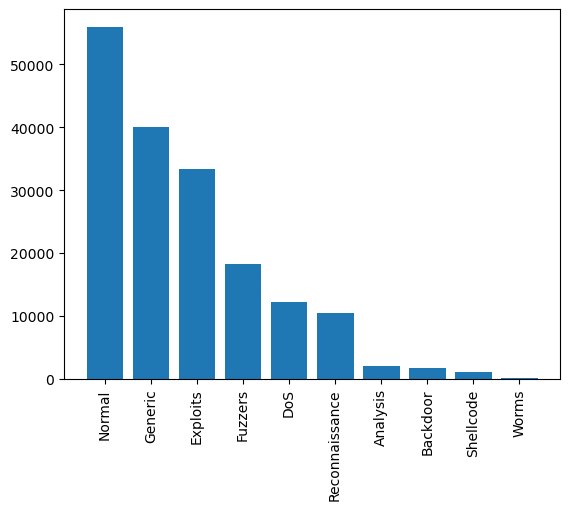

In [7]:
import matplotlib.pyplot as plt
plt.bar(x=df['attack_cat'].value_counts().index, height=df['attack_cat'].value_counts().values)
plt.xticks(rotation=90)

In [8]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
ohe = OneHotEncoder(sparse_output=False, drop='first')
le = LabelEncoder()

In [9]:
df['proto'].value_counts()

proto
tcp       79946
udp       63283
unas      12084
arp        2859
ospf       2595
          ...  
argus        98
netblt       98
igmp         18
icmp         15
rtp           1
Name: count, Length: 133, dtype: int64

In [10]:
df['service'].value_counts()

service
-           94168
dns         47294
http        18724
smtp         5058
ftp-data     3995
ftp          3428
ssh          1302
pop3         1105
dhcp           94
snmp           80
ssl            56
irc            25
radius         12
Name: count, dtype: int64

In [11]:
df['state'].value_counts()

state
INT    82275
FIN    77825
CON    13152
REQ     1991
RST       83
ECO       12
PAR        1
URN        1
no         1
Name: count, dtype: int64

In [12]:
df[['proto', 'attack_cat']][df['attack_cat'] != 'Normal']['proto'].value_counts()

proto
udp        49361
tcp        40825
unas       12084
ospf        2531
sctp        1150
           ...  
argus         98
bbn-rcc       98
hmp           98
rdp           98
netblt        98
Name: count, Length: 129, dtype: int64

In [13]:
# creating a new category "others" for uncommon protocols
for i in range(len(df['proto'].values)):
    if df['proto'].values[i] not in ['tcp', 'udp', 'unas']:
        df.loc[i, 'proto'] = 'others'

In [14]:
df['proto'].value_counts()

proto
tcp       79946
udp       63283
others    20028
unas      12084
Name: count, dtype: int64

In [15]:
df['service'].value_counts()

service
-           94168
dns         47294
http        18724
smtp         5058
ftp-data     3995
ftp          3428
ssh          1302
pop3         1105
dhcp           94
snmp           80
ssl            56
irc            25
radius         12
Name: count, dtype: int64

In [16]:
for i in range(len(df['service'].values)):
    if df['service'].values[i] in ['dhcp', 'snmp', 'ssl', 'irc', 'radius', 'pop3', 'ssh']:
        df.loc[i, 'service'] = 'others'

In [17]:
df['service'].value_counts()

service
-           94168
dns         47294
http        18724
smtp         5058
ftp-data     3995
ftp          3428
others       2674
Name: count, dtype: int64

In [18]:
df['state'].value_counts()

state
INT    82275
FIN    77825
CON    13152
REQ     1991
RST       83
ECO       12
PAR        1
URN        1
no         1
Name: count, dtype: int64

In [19]:
for i in range(len(df['state'].values)):
    if df['state'].values[i] in ['RST', 'ECO', 'PAR', 'URN', 'no']:
        df.loc[i, 'state'] = 'others'

In [20]:
df['state'].value_counts()

state
INT       82275
FIN       77825
CON       13152
REQ        1991
others       98
Name: count, dtype: int64

In [21]:
df.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0


Performing EDA

<Axes: xlabel='count', ylabel='proto'>

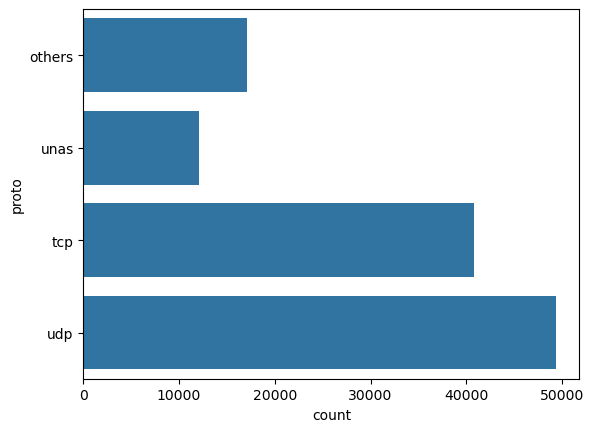

In [22]:
import seaborn as sns
sns.countplot(df[df['label'] == 1]['proto'])

<Axes: xlabel='count', ylabel='state'>

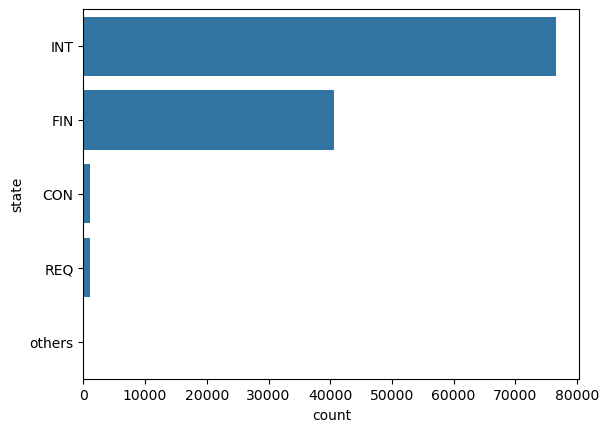

In [23]:
sns.countplot(df[df['label'] == 1]['state'])

<Axes: xlabel='count', ylabel='service'>

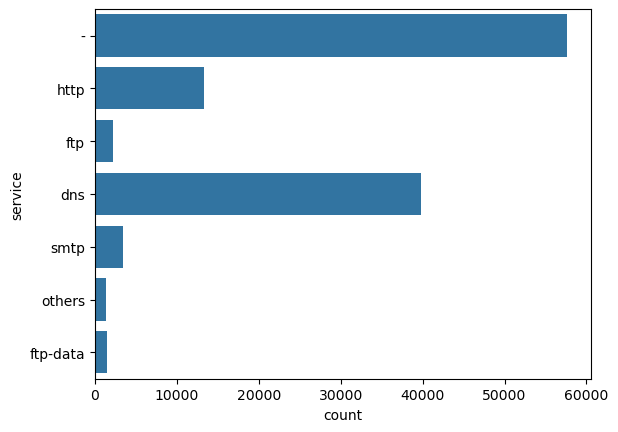

In [24]:
sns.countplot(df[df['label'] == 1]['service'])

<Axes: >

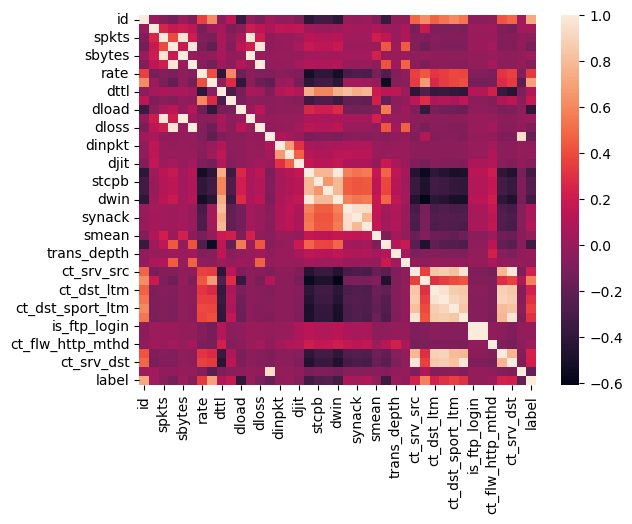

In [25]:
sns.heatmap(df.corr(numeric_only=True))

In [26]:
df['attack_cat'].value_counts()

attack_cat
Normal            56000
Generic           40000
Exploits          33393
Fuzzers           18184
DoS               12264
Reconnaissance    10491
Analysis           2000
Backdoor           1746
Shellcode          1133
Worms               130
Name: count, dtype: int64

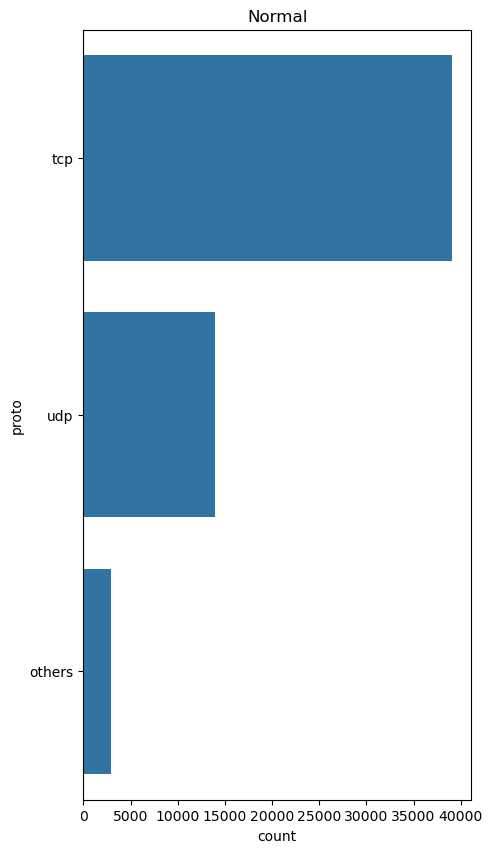

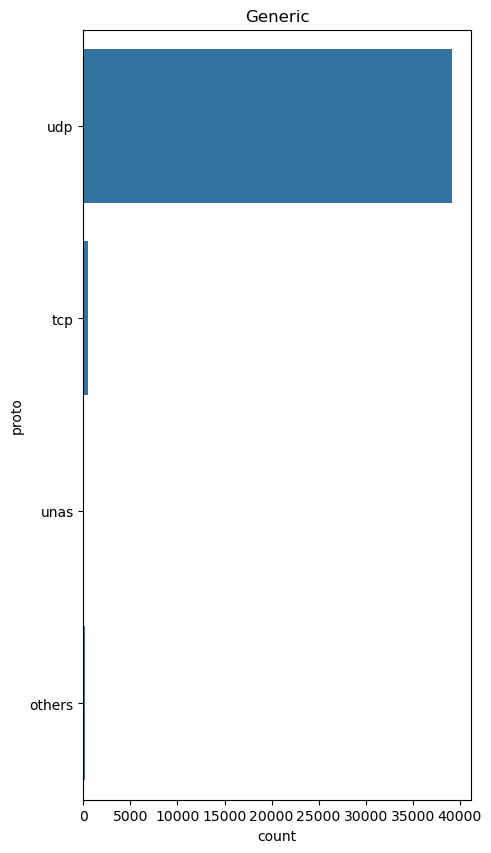

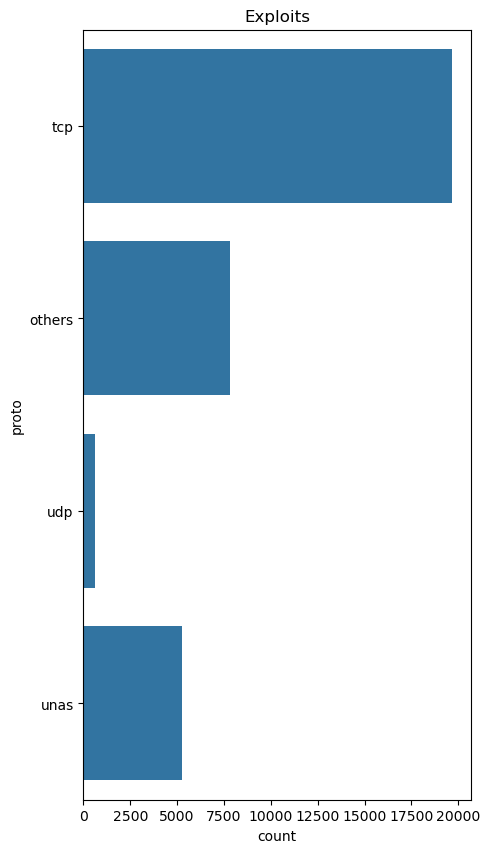

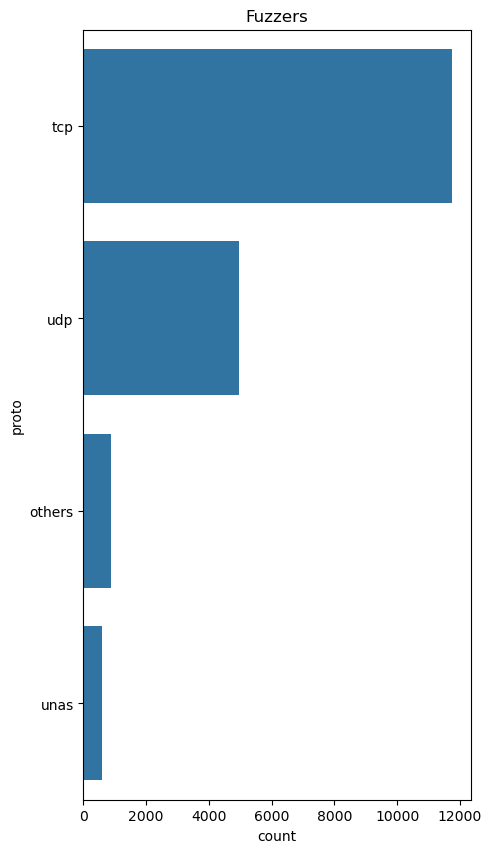

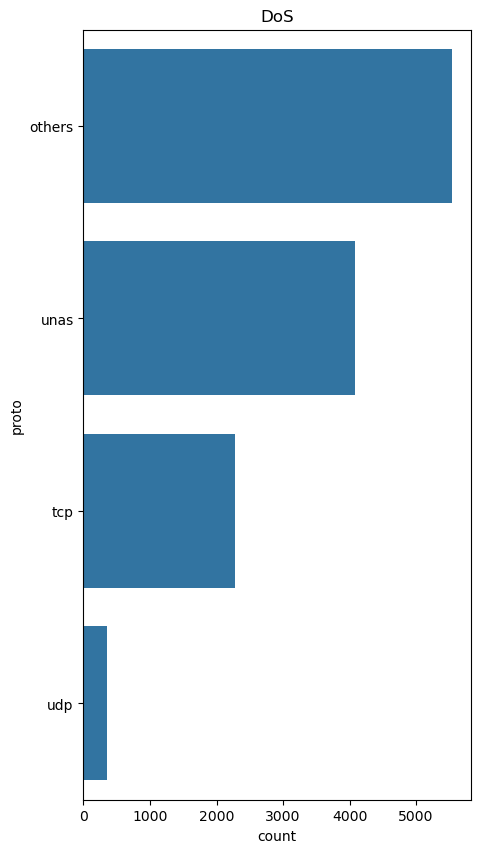

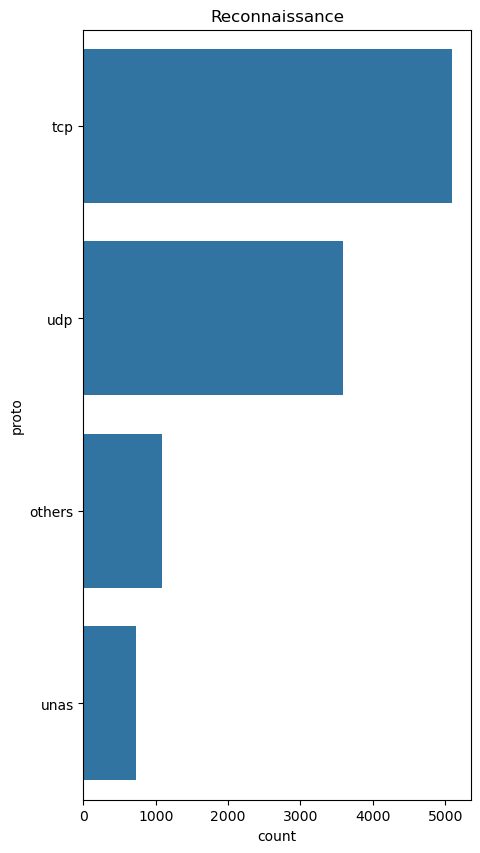

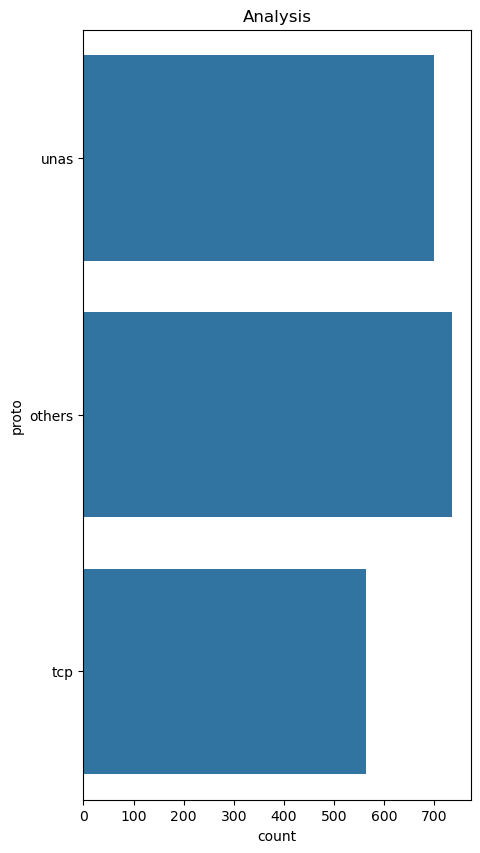

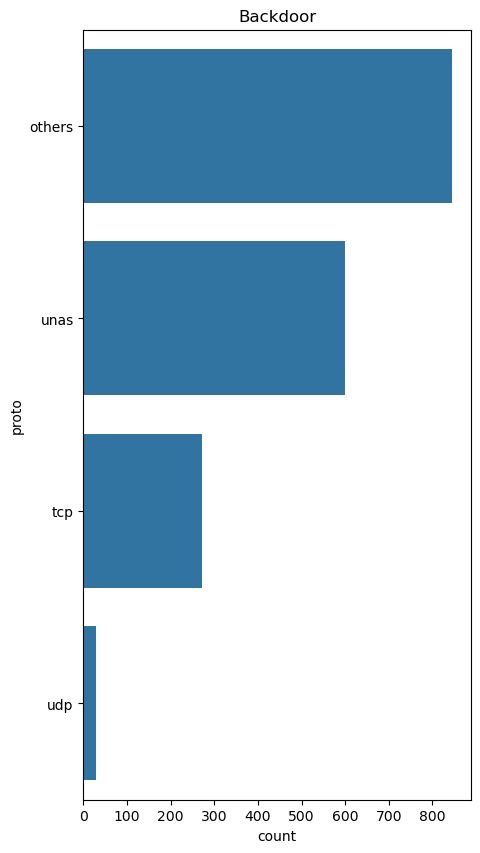

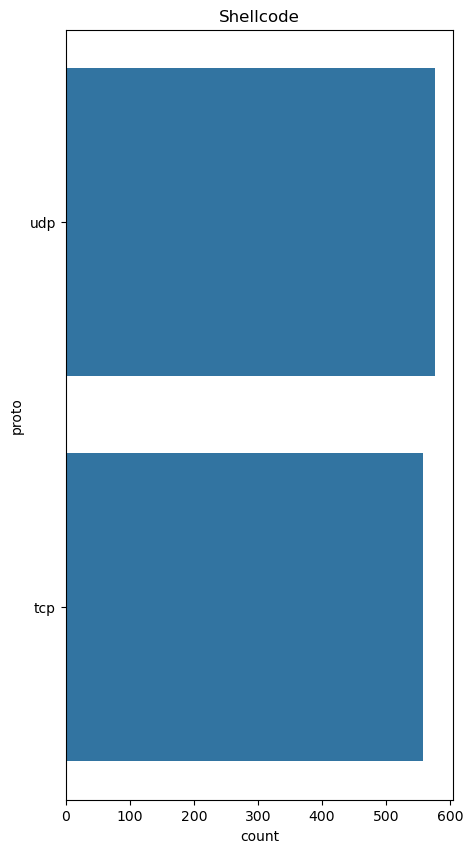

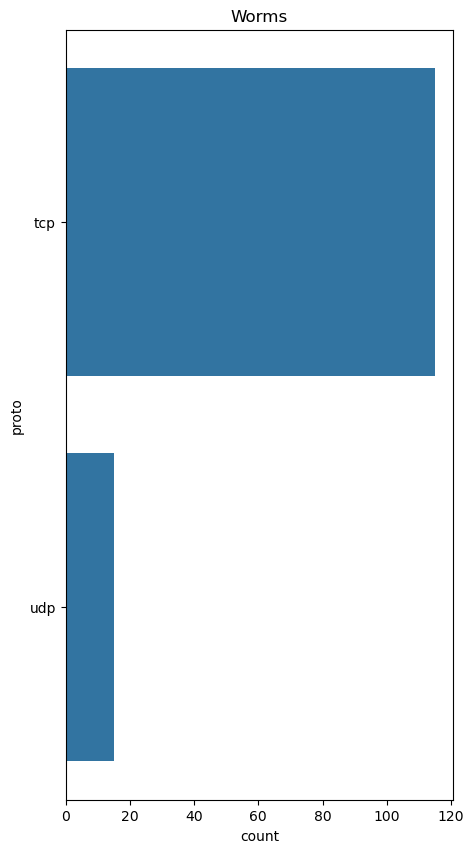

In [27]:
for attack in df['attack_cat'].value_counts().index:
    plt.figure(figsize=(5, 10))
    sns.countplot(df[df['attack_cat'] == attack]['proto'])
    plt.title(attack)
    plt.show()

In [28]:
# applying one hot encoding to proto, service, state
encoded = pd.DataFrame(ohe.fit_transform(df[['proto', 'service', 'state']]), columns=ohe.get_feature_names_out(['proto', 'service', 'state']))
df.drop(['proto', 'service', 'state'], axis=1, inplace=True)
df = pd.concat([df, encoded], axis=1)

In [29]:
df

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,service_dns,service_ftp,service_ftp-data,service_http,service_others,service_smtp,state_FIN,state_INT,state_REQ,state_others
0,1,0.121478,6,4,258,172,74.087490,252,254,1.415894e+04,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2,0.649902,14,38,734,42014,78.473372,62,252,8.395112e+03,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,3,1.623129,8,16,364,13186,14.170161,62,252,1.572272e+03,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,4,1.681642,12,12,628,770,13.677108,62,252,2.740179e+03,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,5,0.449454,10,6,534,268,33.373826,254,252,8.561499e+03,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,175337,0.000009,2,0,114,0,111111.107200,254,0,5.066666e+07,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
175337,175338,0.505762,10,8,620,354,33.612649,254,252,8.826286e+03,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
175338,175339,0.000009,2,0,114,0,111111.107200,254,0,5.066666e+07,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
175339,175340,0.000009,2,0,114,0,111111.107200,254,0,5.066666e+07,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 55 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 175341 non-null  int64  
 1   dur                175341 non-null  float64
 2   spkts              175341 non-null  int64  
 3   dpkts              175341 non-null  int64  
 4   sbytes             175341 non-null  int64  
 5   dbytes             175341 non-null  int64  
 6   rate               175341 non-null  float64
 7   sttl               175341 non-null  int64  
 8   dttl               175341 non-null  int64  
 9   sload              175341 non-null  float64
 10  dload              175341 non-null  float64
 11  sloss              175341 non-null  int64  
 12  dloss              175341 non-null  int64  
 13  sinpkt             175341 non-null  float64
 14  dinpkt             175341 non-null  float64
 15  sjit               175341 non-null  float64
 16  dj

In [31]:
df['attack_cat'].value_counts()

attack_cat
Normal            56000
Generic           40000
Exploits          33393
Fuzzers           18184
DoS               12264
Reconnaissance    10491
Analysis           2000
Backdoor           1746
Shellcode          1133
Worms               130
Name: count, dtype: int64

In [32]:
# label encoding the target column
df['attack_cat'] = le.fit_transform(df['attack_cat'])

In [33]:
df.corr()['attack_cat']

id                  -0.271955
dur                 -0.097825
spkts               -0.008428
dpkts                0.035163
sbytes              -0.040022
dbytes               0.021859
rate                -0.117025
sttl                -0.273835
dttl                -0.146095
sload               -0.112193
dload                0.225681
sloss               -0.031339
dloss                0.027306
sinpkt               0.099613
dinpkt               0.006612
sjit                -0.008554
djit                 0.001956
swin                 0.116306
stcpb                0.087037
dtcpb                0.084535
dwin                 0.108099
tcprtt              -0.111309
synack              -0.092131
ackdat              -0.119348
smean               -0.100486
dmean                0.109198
trans_depth         -0.047626
response_body_len    0.003198
ct_srv_src           0.133634
ct_state_ttl        -0.302136
ct_dst_ltm           0.127281
ct_src_dport_ltm     0.085136
ct_dst_sport_ltm     0.064751
ct_dst_src

In [43]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.drop(['attack_cat', 'label'], axis=1), df['attack_cat'], test_size=0.2, random_state=42)
xgb = XGBClassifier(device='cuda')
xgb.fit(x_train, y_train)

,objective,'multi:softprob'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,'cuda'
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [44]:
from sklearn.metrics import f1_score
f1_score(y_test, xgb.predict(x_test), average='weighted')

[00:02:47] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.



0.8658778634878255

In [46]:
def objective(trial):
    params = {
        'objective': 'multi:softprob',
        'eval_metric': 'mlogloss',
        'device': 'cuda',
        'n_estimators': trial.suggest_int('n_estimators', 100, 800),
        'max_depth': trial.suggest_int('max_depth', 3, 12),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.5, log=True),
        'gamma': trial.suggest_float('gamma', 0, 5),
        'min_child_weight': trial.suggest_int('mim_child_weight', 1, 10)
    }

    model = XGBClassifier(**params)
    model.fit(x_train, y_train)

    return f1_score(y_test, model.predict(x_test), average='weighted')

In [48]:
import optuna
from optuna.samplers import TPESampler

study = optuna.create_study(direction='maximize', sampler=TPESampler())
study.optimize(objective, n_trials=100)

[I 2025-06-24 00:05:08,961] A new study created in memory with name: no-name-78561b36-59cf-4cef-abac-9ecce935cc01
[I 2025-06-24 00:05:23,381] Trial 0 finished with value: 0.8633700179226456 and parameters: {'n_estimators': 594, 'max_depth': 7, 'learning_rate': 0.022999537260099068, 'gamma': 0.7872730852352461, 'mim_child_weight': 2}. Best is trial 0 with value: 0.8633700179226456.
[I 2025-06-24 00:05:30,117] Trial 1 finished with value: 0.8651942217539335 and parameters: {'n_estimators': 663, 'max_depth': 12, 'learning_rate': 0.32577557034414617, 'gamma': 1.7632097887807623, 'mim_child_weight': 7}. Best is trial 1 with value: 0.8651942217539335.
[I 2025-06-24 00:05:35,610] Trial 2 finished with value: 0.8559862076120345 and parameters: {'n_estimators': 585, 'max_depth': 8, 'learning_rate': 0.3700365511262694, 'gamma': 4.8040363371633985, 'mim_child_weight': 8}. Best is trial 1 with value: 0.8651942217539335.
[I 2025-06-24 00:05:43,069] Trial 3 finished with value: 0.8522767427664061 an

In [49]:
study.best_params

{'n_estimators': 712,
 'max_depth': 11,
 'learning_rate': 0.025754287648057567,
 'gamma': 0.2631129619885728,
 'mim_child_weight': 1}

In [50]:
study.best_value

0.8689384477350731

trying out ensemble using xgboost and lightgbm

In [58]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier()
lgbm.fit(x_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004103 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6270
[LightGBM] [Info] Number of data points in the train set: 140272, number of used features: 53
[LightGBM] [Info] Start training from score -4.469214
[LightGBM] [Info] Start training from score -4.617161
[LightGBM] [Info] Start training from score -2.651655
[LightGBM] [Info] Start training from score -1.661883
[LightGBM] [Info] Start training from score -2.261603
[LightGBM] [Info] Start training from score -1.480319
[LightGBM] [Info] Start training from score -1.140684
[LightGBM] [Info] Start training from score -2.816185
[LightGBM] [Info] Start training from score -5.048944
[LightGBM] [Info] Start training from score -7.197378


,boosting_type,'gbdt'
,num_leaves,31
,max_depth,-1
,learning_rate,0.1
,n_estimators,100
,subsample_for_bin,200000
,objective,None
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


In [59]:
f1_score(y_test, lgbm.predict(x_test), average='weighted')

0.8447133740521183

In [61]:
def objective_lgbm(trial):
    params = {
        'objective': 'multiclass',
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'num_leaves': trial.suggest_int('num_leaves', 20, 300),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'min_child_samples': trial.suggest_int('min_child_samples', 10, 100),
        'verbosity': -1 
    }

    model = LGBMClassifier(**params)
    model.fit(x_train, y_train)
    return f1_score(y_test, model.predict(x_test), average='weighted')

study_lgbm = optuna.create_study(direction='maximize')
study_lgbm.optimize(objective_lgbm, n_trials=50)

[I 2025-06-24 01:32:21,840] A new study created in memory with name: no-name-efab5ed2-6f53-4291-b493-8894618060d2
[I 2025-06-24 01:32:46,966] Trial 0 finished with value: 0.8220818428449572 and parameters: {'n_estimators': 885, 'learning_rate': 0.06910121903635645, 'num_leaves': 250, 'max_depth': 6, 'min_child_samples': 77}. Best is trial 0 with value: 0.8220818428449572.
[I 2025-06-24 01:32:52,088] Trial 1 finished with value: 0.7995104816011598 and parameters: {'n_estimators': 302, 'learning_rate': 0.17680536110036474, 'num_leaves': 197, 'max_depth': 4, 'min_child_samples': 79}. Best is trial 0 with value: 0.8220818428449572.
[I 2025-06-24 01:33:06,315] Trial 2 finished with value: 0.6489244149402762 and parameters: {'n_estimators': 990, 'learning_rate': 0.10721301190352164, 'num_leaves': 188, 'max_depth': 7, 'min_child_samples': 16}. Best is trial 0 with value: 0.8220818428449572.
[I 2025-06-24 01:33:15,675] Trial 3 finished with value: 0.7109421828120301 and parameters: {'n_estimat

In [62]:
study_lgbm.best_params

{'n_estimators': 680,
 'learning_rate': 0.011493298871296307,
 'num_leaves': 179,
 'max_depth': 14,
 'min_child_samples': 84}

In [63]:
study_lgbm.best_value

0.8672635626866266

In [64]:
from sklearn.ensemble import StackingClassifier

stack = StackingClassifier(
    estimators=[
        ('xgb', XGBClassifier(**study.best_params)),
        ('lgbm', LGBMClassifier(**study_lgbm.best_params))
    ],
    final_estimator=XGBClassifier()
)
stack.fit(x_train, y_train)

[02:03:39] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "mim_child_weight" } are not used.

[02:05:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "mim_child_weight" } are not used.

[02:05:32] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "mim_child_weight" } are not used.

[02:06:02] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "mim_child_weight" } are not used.

[02:06:34] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "mim_child_weight" } are not used.

[02:07:04] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "mim_child_weight" } are not used.



,estimators,"[('xgb', ...), ('lgbm', ...)]"
,final_estimator,"XGBClassifier...ree=None, ...)"
,cv,None
,stack_method,'auto'
,n_jobs,None
,passthrough,False
,verbose,0
,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None


In [70]:
y_pred = stack.predict(x_test)

In [71]:
f1_score(y_test, y_pred, average='weighted')

0.8709873007854827

In [72]:
f1_score(y_test, y_pred, average='macro')

0.6927218937940166

In [73]:
f1_score(y_test, y_pred, average='micro')

0.8760443696712196

In [74]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_test, y_pred)

0.8760443696712196

In [82]:
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.7619    0.2850    0.4148       393
           1     0.8556    0.2139    0.3422       360
           2     0.4026    0.3059    0.3476      2370
           3     0.6820    0.8712    0.7651      6772
           4     0.9507    0.8754    0.9115      3570
           5     0.9954    0.9844    0.9899      8079
           6     0.9934    0.9937    0.9936     11169
           7     0.9247    0.7374    0.8205      2098
           8     0.7125    0.7339    0.7230       233
           9     0.7647    0.5200    0.6190        25

    accuracy                         0.8760     35069
   macro avg     0.8043    0.6521    0.6927     35069
weighted avg     0.8793    0.8760    0.8710     35069



In [89]:
pd.DataFrame(le.inverse_transform(pd.DataFrame([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])), columns=['Attack_category'])

/usr/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Attack_category
0,Analysis
1,Backdoor
2,DoS
3,Exploits
4,Fuzzers
5,Generic
6,Normal
7,Reconnaissance
8,Shellcode
9,Worms
